In [1]:
import numpy as np
from tqdm import tqdm, tqdm_notebook
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline
RANDOM_STATE = 44

In [2]:
class LogisticRegression:
    """Logistic Regression
    """
    
    def __init__(self, num_iterations, learning_rate=0.1):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.w = None
        self.b = None
        
    @staticmethod
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def fit(self, X, y):
        """Fit method
        
        `y` must a one-dimensional Numpy array consisting only of 0 and 1
        """
        # --- input check ---
        if not X.ndim == 2:
            raise ValueError("`X` must be a 2 dimensional Numpy array")
        
        if not y.ndim == 1:
            raise ValueError("`y` must be 1 dimensional Numpy array")
            
        y = y.reshape(-1, 1)
            
        # --- initialize params ---
        self.w = np.random.rand(X.shape[1], 1) * 2 - 1.0
        self.b = np.random.rand(1, 1) * 2 - 1.0
        
        # --- fit ---
        for i in tqdm_notebook(range(self.num_iterations)):
            # forward
            y_pred = self.predict(X)
            
            print("y.shape:", y.shape)
            print("y_pred.shape:", y_pred.shape)
            
            # backward (update model params)
            w_grad = np.mean(-1 * (y - y_pred) * X, axis=0, keepdims=True).T
            b_grad = np.mean(-1 * (y - y_pred), axis=0, keepdims=True)
            
            print("w_grad.shape", w_grad.shape)
            print("b_grad.shape", b_grad.shape)
            
            self.w = self.w - self.learning_rate * w_grad
            self.b = self.b - self.learning_rate * b_grad
            print("i:", str(i), " - error:", np.abs(y - y_pred).mean())        
    
    def predict(self, x):
        # --- input check ---
        if not x.ndim == 2:
            raise ValueError("`x` must be a 2 dimensional Numpy array. \
                                If it is only a single sample, please reshape it via x.reshape(1, -1)")
        
        # --- predict ---
        y = np.matmul(x, self.w) + self.b
        y = self.sigmoid(y)
        return y

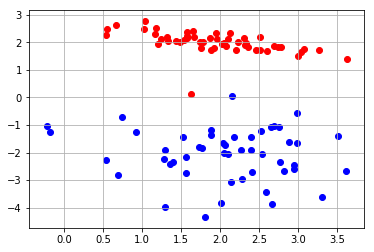

In [3]:
X, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           class_sep=2, 
                           random_state=RANDOM_STATE)
# Plot
fig = plt.figure()
X_0 = X[y == 0]
X_1 = X[y == 1]
plt.scatter(X_0[:, 0], X_0[:, 1], c='r')
plt.scatter(X_1[:, 0], X_1[:, 1], c='b')
plt.grid(True)

In [4]:
model = LogisticRegression(num_iterations=50, learning_rate=0.1)

In [5]:
model.fit(X, y)

y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 0  - error: 0.21723971025534916
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 1  - error: 0.2021227701453745
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 2  - error: 0.18900415067566997
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 3  - error: 0.17758833037130897
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 4  - error: 0.16761091802656553
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 5  - error: 0.15884472702713334
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 6  - error: 0.15109882371512284
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape (1, 1)
i: 7  - error: 0.1442146058646204
y.shape: (100, 1)
y_pred.shape: (100, 1)
w_grad.shape (2, 1)
b_grad.shape 

In [6]:
y_pred = model.predict(X)

In [7]:
y

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [8]:
(y_pred.flatten() > 0.5).astype(np.int)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])